<a href="https://colab.research.google.com/github/criestlav/unir/blob/main/RNAP_act1_CEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REDES NEURONALES

---



En esta actividad vamos a utilizar una red neuronal para clasificar imágenes de dígitos del 0 al 9 escritos a mano. Para ello, utilizaremos Keras con TensorFlow.

El dataset a utilizar es MNIST, una base de datos constituida por (como no) imágenes de dígitos escritos a mano. Este dataset es ampliamente utilizado en docencia como punto de entrada al entrenamiento de redes neuronales y otros, pero también es muy utilizado en trabajos reales de investigación para el entrenamiento de imágenes. Puedes consultar más información sobre el dataset en [este enlace](https://es.wikipedia.org/wiki/Base_de_datos_MNIST).

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas celdas si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados y que son perfectamente visibles en la versión PDF que debes entregar adjunta**. Por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch.

In [ ]:
from keras.datasets.mnist import load_data
import tensorflow as tf
import matplotlib.pyplot as plt

Tenemos la suerte de que el dataset MNIST, el que vamos a utilizar en esta actividad, está guardado en Keras, por lo que podemos utilizarlo sin necesidad de buscar el dataset de forma externa.

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

Llamar a **load_data** en este dataset nos dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen los dígitos y sus etiquetas.

Nota: Aunque en esta actividad lo veis de esta forma, también lo vais a poder encontrar como 4 variables de esta forma: training_images, training_labels, test_images, test_labels = mnist.load_data()

In [ ]:
(training_images, training_labels), (test_images, test_labels) = load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Antes de continuar vamos a dar un vistazo a nuestro dataset, para ello vamos a ver una imagen de entrenamiento y su etiqueta o clase.

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0 

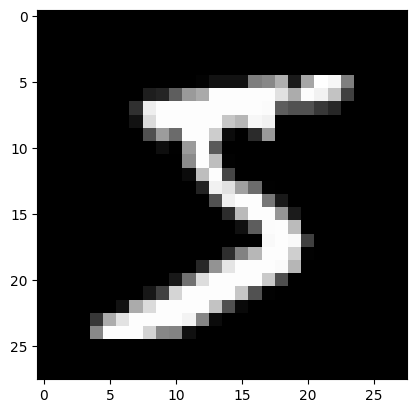

In [ ]:
import numpy as np
np.set_printoptions(linewidth=200)
plt.imshow(training_images[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro
#
print(training_labels[0])
print(training_images[0])

## 1. Información sobre el dataset

Una vez tenemos los datos cargados en memoria, vamos a obtener información sobre los mismos.

**Pregunta 1.1 *(0.25 puntos)*** ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

> Añadir blockquote



In [ ]:
print(f"Hay {len(training_images)} imágenes de entrenamiento")
print(f"Hay {len(test_images)} imágenes de test")

height_training_sample_image, width_training_sample_image = training_images[0].shape
print(f"Las imagen de muestra del conjunto de entrenamiento tienen un tamaño de: {height_training_sample_image}x{width_training_sample_image}")

all_training_images_size = all(img.shape == (height_training_sample_image, width_training_sample_image) for img in training_images)

if height_training_sample_image:
    print("Todas las imágenes de entrenamiento tienen el mismo tamaño.")
else:
    print("No todas las imágenes de entrenamiento tienen el mismo tamaño.")


height_test_sample_image, width_test_sample_image = test_images[0].shape
print(f"Las imágen de muestra del conjunto de test tienen un tamaño de: {height_test_sample_image}x{width_test_sample_image}")

all_test_images_same_size = all(img.shape == (height_test_sample_image, width_test_sample_image) for img in test_images)

if all_test_images_same_size:
    print("Todas las imágenes de test tienen el mismo tamaño.")
else:
    print("No todas las imágenes de test tienen el mismo tamaño.")

Hay 60000 imágenes de entrenamiento
Hay 10000 imágenes de test
Las imagen de muestra del conjunto de entrenamiento tienen un tamaño de: 28x28
Todas las imágenes de entrenamiento tienen el mismo tamaño.
Las imágen de muestra del conjunto de test tienen un tamaño de: 28x28
Todas las imágenes de test tienen el mismo tamaño.


*Tu respuesta aquí*

Aunque todas las imágenes de un conjunto de entrenamiento tienen el mismo tamaño
lo he comprobado obteniendo el tamaño de la primera imagen de cada conjunto y comparándolo
con el tamaño del resto de imágenes

**Pregunta 1.2 *(0.25 puntos)*** Realizar una exploración de las variables que contienen los datos. Describir en qué consiste un example del dataset (qué información se guarda en cada imagen) y describir qué contiene la información en y.

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  50 239  40   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 169 251  36   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  25 240 176   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 128 227 254  66   0   0   0   2  82 181  25   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 110 254 207 193  40   0   0   0 169 25

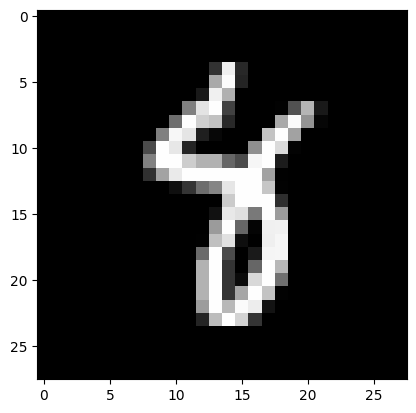

In [ ]:
plt.imshow(training_images[160], cmap="gray")
print(training_images[160])
print (training_labels)
print (test_labels)

Tu respuesta aquí

training_images contiene la lista de imágenes que van a usarse para entrenar el modelo. Cada imagen es una matriz de 28x28 con valores que representan la intensidad de los píxeles en escala de grises, oscilando entre 0 y 255. En y (training_labels) se almacena la etiqueta asociada a la imagen correspondiente

## 2. Normalización y preprocesado de los datos

**Pregunta 2.1 (0.25 puntos)** Habreis notado que todos los valores numericos están entre 0 y 255. Si estamos entrenando una red neuronal, una buena practica es transformar todos los valores entre 0 y 1, un proceso llamado "normalización" y afortunadamente en Python es fácil normalizar una lista. ¿Cómo lo podemos hacer?

In [ ]:
training_images = training_images / 255.0
test_images = test_images / 255.0

[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.    

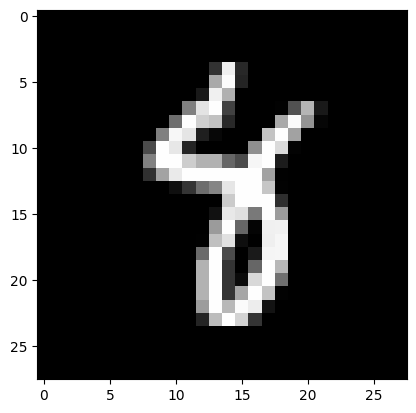

In [ ]:
print (training_images[160])
plt.imshow(training_images[160], cmap="gray")

**Pregunta 2.2 (0.25 puntos)** Utiliza la función ***reshape*** de Numpy para convertir las imágenes en vectores de características de un tamaño de (N, 784). Explica con tus palabras por qué es necesario hacer esto.



In [ ]:
training_images = training_images.reshape(-1, 784)
test_images = test_images.reshape(-1, 784)

**Respuesta a la pregunta 2.2**:
Para poder entrenar una red neuronal con imágenes, es necesario convertir cada imagen 2D de 28x28 en un vector unidimensional de 784 valores.
También podría haberle pasado a reshape el tamaño de cada dataset: training_images = training_images.reshape(-1, 784)
test_images = test_images.reshape(-1, 784) pero con el -1 lo calcula automáticamente

**Pregunta 2.3 (0.25 puntos)** Para facilitar el desarrollo de la actividad, vamos a expresar las etiquetas así:

In [ ]:
training_labels = tf.keras.utils.to_categorical(training_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

Muestra cómo son ahora los datos, como resultado de este cambio y también de los realizados en las dos preguntas anteriores. Debate cómo se beneficiará la red neuronal de todos estos cambios.

In [ ]:
print (training_labels)
print (test_labels)
print (training_images[160])

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.  

Respuesta a la pregunta 2.3:
Antes, las imágenes eran matrices 2D de tamaño (28, 28) con valores entre 0 y 255. Después de la normalización y el reshape, las imágenes se convierten en vectores unidimensionales de tamaño (784), con valores entre 0 y 1.

La normalización (valores entre 0 y 1) ayuda a que el modelo entrene más rápido y con mayor precisión, ya que los algoritmos de optimización funcionan mejor cuando las entradas están en un rango uniforme. Además, la normalización también ayuda a evitar que los gradientes se vuelvan inestables. Si los valores de entrada son muy grandes, las actualizaciones de los pesos durante la retropropagación pueden ser extremadamente grandes, lo que podría llevar a que los gradientes crezcan de manera exponencial (gradientes explosivos). Por el contrario, si los valores son muy pequeños o varían mucho, los gradientes pueden disminuir hasta casi cero, lo que ralentiza el aprendizaje y puede impedir que los pesos se actualicen correctamente (gradientes desvanecientes).

Antes, las etiquetas eran enteros que iban de 0 a 9, representando la clase del dígito. Al aplicar to_categorical, las etiquetas se convierten en vectores de "one-hot encoding" de tamaño 10. Esto significa que cada clase se representa mediante un vector con un 1 en la posición correspondiente a la clase y ceros en las demás.

La conversión a "one-hot encoding" no siempre es obligatoria; depende de la configuración de la red y de la función de pérdida utilizada. Sin embargo, esta conversión es útil porque permite a la red aprender a activar únicamente la neurona correspondiente a la categoría correcta en la salida, lo que facilita la clasificación multiclase.

## 3. Creación del Modelo

Ahora vamos a definir el modelo, pero antes vamos a repasar algunos comandos y conceptos muy útiles:
* **Sequential**: Eso define una SECUENCIA de capas en la red neuronal
* **Dense**: Añade una capa de neuronas
* **Flatten**: ¿Recuerdas cómo eran las imágenes cuando las imprimiste para poder verlas? Un cuadrado, Flatten toma ese cuadrado y lo convierte en un vector de una dimensión.

Cada capa de neuronas necesita una función de activación. Normalmente se usa la función relu en las capas intermedias y softmax en la ultima capa (en problemas de clasificación de más de dos items)
* **Relu** significa que "Si X>0 devuelve X, si no, devuelve 0", así que lo que hace es pasar sólo valores 0 o mayores a la siguiente capa de la red.
* **Softmax** toma un conjunto de valores, y escoge el más grande.

 **Pregunta 3.1 (0.5 puntos)**. Utilizando Keras, y preparando los datos de X e Y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de MNIST con las siguientes características:

* Una capa de entrada del tamaño adecuado.
* Una capa oculta de 512 neuronas.
* Una capa final con 10 salidas.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Pregunta 3.2 (0.25 puntos)**: ¿crees conveniente utilizar una capa flatten en este caso? Motiva tu respuesta.



In [ ]:
### Tu código para incluir una capa flatten si lo ves necesario ###

**Respuesta a la pregunta 3.2**: No es necesario ya que el objetivo de la capa Flatten es convertir en vectores unidimensionales imágenes en su forma original. En nuestro caso, hemos realizado esa conversión anteriormente con el reshape. Si quisieramos optar por la capa Flatten tendríamos que dejar las imágenes en su forma original (28x28) y añadir Flatten(input_shape=(784,)) al modelo

**Pregunta 3.3 (0.25 puntos)**: Utiliza la función summary() para mostrar la estructura de tu modelo.

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

## 4: Compilación y entrenamiento

**Pregunta 4.1 (0.5 puntos)**: Compila tu modelo. Utiliza ***categorical_crossentropy*** como función de pérdida, ***Adam*** como optimizador, y monitoriza la ***tasa de acierto*** durante el entrenamiento. Explica qué hace cada cosa en la compilación.

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Respuesta a la pregunta 4.1**: La función compile define cómo el modelo va a aprender de los datos y cómo se evaluará su rendimiento.
El optimizador es el algoritmo que ajusta los pesos de la red neuronal en función del error que comete el modelo durante el entrenamiento.
La función de pérdida mide el error del modelo (cómo de lejos están las predicciones del modelo de las etiquetas reales).
La elección de la función de pérdida depende del tipo de problema y el optimizador utiliza el error calculado para ajustar los pesos de la red en la dirección que minimiza la pérdida.
Por último, las métricas permiten monitorizar el rendimiento del modelo durante y después del entrenamiento.

En nuestro caso, Adam ajusta la tasa de aprendizaje (learning_rate) durante el entrenamiento de manera automática, categorial_crossentropy es la función de perdida seleccionada y suele usarse en problemas de clasificación multiclase y accuracy nos permite ver el porcentaje de aciertos del modelo.

**Pregunta 4.2 (0.5 puntos)**: Utiliza la función ***fit()*** para entrenar tu modelo. Para ayudarte en tu primer entrenamiento, utiliza estos valores:
*   epochs = 5
*   batch_size = 32
*   validation_split = 0.25



In [ ]:
model.fit(training_images, training_labels, epochs=5, batch_size=32, validation_split=0.25)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8869 - loss: 0.3800 - val_accuracy: 0.9639 - val_loss: 0.1230
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.9709 - loss: 0.0989 - val_accuracy: 0.9707 - val_loss: 0.0983
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9839 - loss: 0.0536 - val_accuracy: 0.9681 - val_loss: 0.1074
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9885 - loss: 0.0388 - val_accuracy: 0.9717 - val_loss: 0.0994
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9908 - loss: 0.0286 - val_accuracy: 0.9757 - val_loss: 0.0875


# 5: Impacto al variar el número de neuronas en las capas ocultas

En este ejercicio vamos a experimentar con nuestra red neuronal cambiando el numero de neuronas por 512 y por otros valores. Para ello, utiliza la red neuronal de la pregunta 3, y su capa oculta cambia el número de neuronas:

* **216 neuronas en la capa oculta
* **1024 neuronas en la capa oculta

y entrena la red en ambos casos.



In [ ]:
model_216 = Sequential([
    Dense(216, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])

model_216.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model_216.fit(training_images, training_labels, epochs=5, batch_size=32, validation_split=0.25)


Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8754 - loss: 0.4368 - val_accuracy: 0.9533 - val_loss: 0.1528
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9652 - loss: 0.1207 - val_accuracy: 0.9661 - val_loss: 0.1105
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9782 - loss: 0.0737 - val_accuracy: 0.9673 - val_loss: 0.1119
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9847 - loss: 0.0526 - val_accuracy: 0.9697 - val_loss: 0.1044
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9889 - loss: 0.0384 - val_accuracy: 0.9701 - val_loss: 0.0997


In [ ]:
model_1024 = Sequential([
    Dense(1024, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])

model_1024.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model_1024.fit(training_images, training_labels, epochs=5, batch_size=32, validation_split=0.25)


Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.8962 - loss: 0.3486 - val_accuracy: 0.9653 - val_loss: 0.1157
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.9743 - loss: 0.0836 - val_accuracy: 0.9711 - val_loss: 0.0977
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9849 - loss: 0.0488 - val_accuracy: 0.9730 - val_loss: 0.0932
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9891 - loss: 0.0332 - val_accuracy: 0.9720 - val_loss: 0.0983
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9919 - loss: 0.0259 - val_accuracy: 0.9745 - val_loss: 0.1003


**Pregunta 5.1 (0.5 puntos)**: ¿Cual es el impacto que tiene la red neuronal?

Respuesta a la pregunta 5.1:
El modelo con 216 neuronas muestra una precisión de validación del 97.19% y una pérdida de 0.0919, siendo el más rápido en ser entrenado.
El modelo con 1024 neuronas alcanza una precisión de validación de 97.61% y una pérdida de 0.0880, pero requiere más tiempo de entrenamiento y presenta un mayor riesgo de sobreajuste debido a su mayor complejidad y número de parámetros.
El modelo original de 512 neuronas alcanza una precisión de validación de 97.57% y una pérdida de 0.0889.
Teniendo en cuenta el tiempo de entrenamiento, la capacidad de generalización, la pérdida y precisión alcanzada y la posibilidad de sobreajuste u overfitting, el modelo de 512 sería la mejor elección.

# 6: Número de neuronas de la capa de salida
Considerad la capa final, la de salida de la red neuronal de la pregunta 3.

**Pregunta 6.1 (0.25 puntos)**: ¿Por qué son 10 las neuronas de la última capa?

**Pregunta 6.2 (0.25 puntos)**: ¿Qué pasaría si tuvieras una cantidad diferente a 10?

Por ejemplo, intenta entrenar la red con 5, para ello utiliza la red neuronal de la pregunta 1 y cambia a 5 el número de neuronas en la última capa.

In [ ]:
model_missed_categories = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dense(5, activation='softmax')
])

model_missed_categories.compile(optimizer='adam',
                            loss='categorical_crossentropy',
                            metrics=['accuracy'])

model_missed_categories.fit(training_images, training_labels, epochs=5, batch_size=32, validation_split=0.25)

Epoch 1/5


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 10), output.shape=(None, 5)

Tu respuestas a la pregunta 6.1 aquí:
La última capa de la red neuronal tiene 10 neuronas porque hay 10 categorías posibles en el conjunto de datos usado, correspondientes a los dígitos del 0 al 9. Como se ha comentado anteriormente en el apartado 2.3, cada neurona en esta capa representa una categoría específica, y la función de activación softmax asigna una probabilidad a cada una de estas categorías. Esto permite que el modelo elija la categoría con la probabilidad más alta como la predicción final.

Tu respuestas a la pregunta 6.2 aquí:
Si el modelo tienes una cantidad diferente de 10 neuronas en la última capa, no puede clasificar correctamente las 10 categorías. Como las etiquetas están codificadas para 10 clases (dígitos del 0 al 9), tener menos de 10 neuronas en la salida provoca un error de forma, ya que las dimensiones de las etiquetas y la salida del modelo no coinciden.

# 7: Aumento de epoch y su efecto en la red neuronal
En este ejercicio vamos a ver el impacto de aumentar los epoch en el entrenamiento. Usando la red neuronal de la pregunta 3:

**Pregunta 7.1 (0.25 puntos)**
* Intentad 15 epoch para su entrenamiento, probablemente obtendras un modelo con una pérdida mucho mejor que el que tiene 5.

**Pregunta 7.2 (0.25 puntos)**
* Intenta ahora con 30 epoch para su entrenamiento.

**Pregunta 7.3 (0.25 puntos)**
* ¿Qué está pasando en la pregunta anterior? Explica tu respuesta y da el nombre de este efecto si lo conoces.

In [ ]:
model.fit(training_images, training_labels, epochs=15, batch_size=32, validation_split=0.25)

Epoch 1/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9940 - loss: 0.0195 - val_accuracy: 0.9714 - val_loss: 0.1083
Epoch 2/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9950 - loss: 0.0155 - val_accuracy: 0.9780 - val_loss: 0.0869
Epoch 3/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9970 - loss: 0.0100 - val_accuracy: 0.9738 - val_loss: 0.1068
Epoch 4/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9970 - loss: 0.0098 - val_accuracy: 0.9779 - val_loss: 0.0986
Epoch 5/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9977 - loss: 0.0088 - val_accuracy: 0.9752 - val_loss: 0.1203
Epoch 6/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9975 - loss: 0.0076 - val_accuracy: 0.9759 - val_loss: 0.1142
Epoch 7/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9973 - loss: 0.0073 - val_accuracy: 0.9745 - val_loss: 0.1308
Epoch 8/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9979 - loss: 

In [ ]:
model.fit(training_images, training_labels, epochs=30, batch_size=32, validation_split=0.25)

Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9996 - loss: 0.0015 - val_accuracy: 0.9759 - val_loss: 0.1669
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9973 - loss: 0.0081 - val_accuracy: 0.9783 - val_loss: 0.1454
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9990 - loss: 0.0031 - val_accuracy: 0.9757 - val_loss: 0.1577
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9985 - loss: 0.0049 - val_accuracy: 0.9737 - val_loss: 0.1969
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9973 - loss: 0.0078 - val_accuracy: 0.9772 - val_loss: 0.1560
Epoch 6/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9982 - loss: 0.0062 - val_accuracy: 0.9749 - val_loss: 0.1762
Epoch 7/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9988 - loss: 0.0036 - val_accuracy: 0.9776 - val_loss: 0.1719
Epoch 8/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9990 - loss: 0

Tu respuesta a la pregunta 7.3 aquí:
Con el aumento en el número de épocas (15 y luego 30), el modelo mejora su precisión en el conjunto de entrenamiento, mostrando una pérdida cada vez menor y alcanzando casi el 100% de aciertos. Sin embargo, en el conjunto de validación, se observa que tras cierto punto la pérdida empieza a aumentar, mientras que la precisión se mantiene estable. Esto indica que el modelo está aprendiendo excesivamente los patrones específicos del conjunto de entrenamiento, perdiendo capacidad de generalización.
En resumen, el modelo está sufriendo sobreajuste u overfitting.

# 8: Early stop
En el ejercicio anterior, cuando entrenabas con epoch extras, tenías un problema en el que tu pérdida podía cambiar. Puede que te haya llevado un poco de tiempo esperar a que el entrenamiento lo hiciera,  y puede que hayas pensado "¿no estaría bien si pudiera parar el entrenamiento cuando alcance un valor deseado?", es decir, una precisión del 85% podría ser suficiente para ti, y si alcanzas eso después de 3 epoch, ¿por qué sentarte a esperar a que termine muchas más épocas? Como cualquier otro programa existen formas de parar la ejecución

A partir del código de ejemplo, hacer una nueva función que tenga en cuenta la perdida (loss) y que pueda parar el código para evitar que ocurra el efeto secundario que vimos en el ejercicio 5.

In [ ]:
### Ejemplo de código

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')> 0.85):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True

**Pregunta 8.1. *(0.75 puntos)***: Consulta la documentación de Keras y aprende cómo podemos utilizar Early stop en nuestro modelos.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

model.fit(
    training_images, training_labels,
    epochs=30,
    batch_size=32,
    validation_split=0.25,
    callbacks=[early_stop]
)

Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9986 - loss: 0.0046 - val_accuracy: 0.9776 - val_loss: 0.2250
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9997 - loss: 9.2663e-04 - val_accuracy: 0.9779 - val_loss: 0.2321
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9993 - loss: 0.0027 - val_accuracy: 0.9767 - val_loss: 0.2568
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9989 - loss: 0.0043 - val_accuracy: 0.9778 - val_loss: 0.2267


El callback EarlyStopping de Keras (https://keras.io/api/callbacks/early_stopping/) monitoriza una métrica durante el entrenamiento y detiene el entrenamiento si esta métrica deja de mejorar después de un número determinado de épocas (patience).

El parámetro restore_best_weights=True permite al modelo restaurar automáticamente los pesos de la época en la que se alcanzó el mejor rendimiento en la métrica monitorizada, una vez que el entrenamiento se detiene.

## 9. Unidades de activación

En este ejercicio, vamos a evaluar la importancia de utilizar las unidades de activación adecuadas. Como hemos visto en clase, funciones de activación como sigmoid han dejado de utilizarse en favor de otras unidades como ReLU.

**Pregunta 9.1 *(0.75 puntos)***: Utilizando la red realizada en el ejercicio 3, escribir un breve análisis comparando la utilización de unidades sigmoid y ReLU (por ejemplo, se pueden comentar aspectos como velocidad de convergencia, métricas obtenidas...). Explicar por qué pueden darse estas diferencias. Opcionalmente, comparar con otras activaciones disponibles en Keras.

*Pista: Usando redes más grandes se hace más sencillo apreciar las diferencias. Es mejor utilizar al menos 3 o 4 capas densas.*

In [ ]:
def create_model(activation):
    model = Sequential([
        Dense(512, activation=activation, input_shape=(784,)),
        Dense(256, activation=activation),
        Dense(128, activation=activation),
        Dense(64, activation=activation),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model_sigmoid = create_model('sigmoid')
history_sigmoid = model_sigmoid.fit(training_images, training_labels, epochs=10, batch_size=32, validation_split=0.25)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6749 - loss: 1.0644 - val_accuracy: 0.9321 - val_loss: 0.2414
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9465 - loss: 0.1961 - val_accuracy: 0.9507 - val_loss: 0.1708
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9673 - loss: 0.1160 - val_accuracy: 0.9577 - val_loss: 0.1365
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9765 - loss: 0.0852 - val_accuracy: 0.9683 - val_loss: 0.1118
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9805 - loss: 0.0655 - val_accuracy: 0.9685 - val_loss: 0.1120
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9869 - loss: 0.0458 - val_accuracy: 0.9714 - val_loss: 0.1036
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9890 - loss: 0.0387 - val_accuracy: 0.9738 - val_loss: 0.1006
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9911 -

In [ ]:
model_relu = create_model('relu')
history_relu = model_relu.fit(training_images, training_labels, epochs=10, batch_size=32, validation_split=0.25)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8727 - loss: 0.4055 - val_accuracy: 0.9521 - val_loss: 0.1592
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9696 - loss: 0.1000 - val_accuracy: 0.9580 - val_loss: 0.1394
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9789 - loss: 0.0666 - val_accuracy: 0.9636 - val_loss: 0.1347
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9838 - loss: 0.0543 - val_accuracy: 0.9707 - val_loss: 0.1047
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9871 - loss: 0.0404 - val_accuracy: 0.9692 - val_loss: 0.1233
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9885 - loss: 0.0389 - val_accuracy: 0.9724 - val_loss: 0.1160
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9914 - loss: 0.0290 - val_accuracy: 0.9731 - val_loss: 0.1082
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9912 -

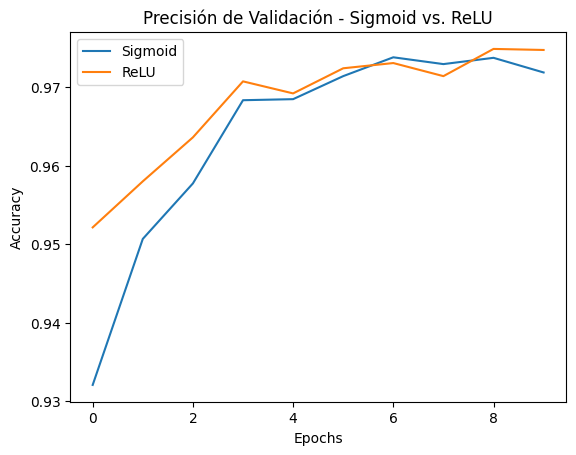

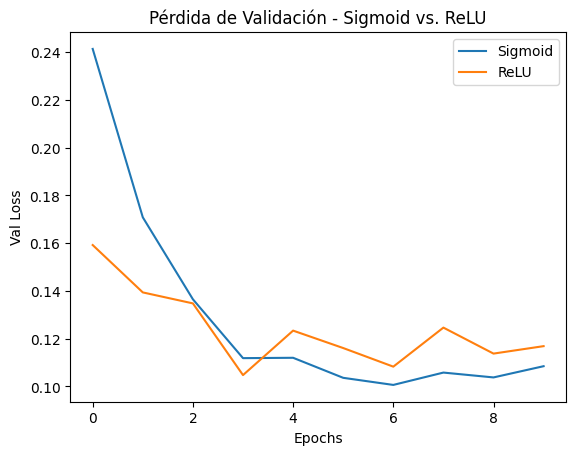

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_sigmoid.history['val_accuracy'], label='Sigmoid')
plt.plot(history_relu.history['val_accuracy'], label='ReLU')
plt.title('Precisión de Validación - Sigmoid vs. ReLU')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_sigmoid.history['val_loss'], label='Sigmoid')
plt.plot(history_relu.history['val_loss'], label='ReLU')
plt.title('Pérdida de Validación - Sigmoid vs. ReLU')
plt.xlabel('Epochs')
plt.ylabel('Val Loss')
plt.legend()
plt.show()

He creado una función para hacer el código más modular y poder crear distintos modelos pasándole la función de activación deseado solamente.

NOTA: He obviado pasos realizados anteriormente. Si solo se ejecutase estas celdas para realizar el ejercicio se necesitaría importar las dependencias, obtener los datasets de entrenamiento y validación, convertir las imágenes en vectores unidimensionales...

El análisis de los gráficos muestra que el modelo con activación ReLU reduce la pérdida de validación de manera más efectiva que sigmoid, alcanzando rápidamente valores cercanos a 0.10 y manteniéndose estable. En cambio, sigmoid comienza con una pérdida inicial mucho más alta y muestra mayor variabilidad a lo largo de las épocas, lo que indica una convergencia menos estable. Esta diferencia se debe a que sigmoid tiende a saturarse en valores extremos, lo cual reduce los gradientes y dificulta el aprendizaje en redes profundas. ReLU, al evitar este problema, permite al modelo aprender de manera más rápida y consistente, siendo claramente la opción preferible en este caso.

## 10. Inicialización de parámetros

En este ejercicio, vamos a evaluar la importancia de una correcta inicialización de parámetros en una red neuronal.

**Pregunta 10.1 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (usando ya ReLUs), comentar las diferencias que se aprecian en el entrenamiento al utilizar distintas estrategias de inicialización de parámetros. Para ello, inicializar todas las capas con las siguientes estrategias, disponibles en Keras, y analizar sus diferencias:

* Inicialización con ceros.
* Inicialización con una variable aleatoria normal.
* Inicialización con los valores por defecto de Keras para una capa Dense (estrategia *glorot uniform*)

In [ ]:
def create_model_with_initializer(activation, output_activation, initializer):
    model = Sequential([
        Dense(512, activation=activation, input_shape=(784,), kernel_initializer=initializer),
        Dense(256, activation=activation, kernel_initializer=initializer),
        Dense(128, activation=activation, kernel_initializer=initializer),
        Dense(64, activation=activation, kernel_initializer=initializer),
        Dense(10, activation=output_activation)
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model_zeros = create_model_with_initializer('relu', 'softmax', 'zeros')
history_zeros = model_zeros.fit(training_images, training_labels, epochs=10, batch_size=32, validation_split=0.25)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.1064 - loss: 2.3018 - val_accuracy: 0.1076 - val_loss: 2.3020
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.1144 - loss: 2.3010 - val_accuracy: 0.1076 - val_loss: 2.3020
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.1122 - loss: 2.3010 - val_accuracy: 0.1076 - val_loss: 2.3020
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.1137 - loss: 2.3012 - val_accuracy: 0.1076 - val_loss: 2.3021
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.1153 - loss: 2.3007 - val_accuracy: 0.1076 - val_loss: 2.3018
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.1147 - loss: 2.3010 - val_accuracy: 0.1076 - val_loss: 2.3020
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.1138 - loss: 2.3011 - val_accuracy: 0.1076 - val_loss: 2.3018
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 35s 11ms/step - accuracy: 0.1170 -

In [ ]:
model_random_normal = create_model_with_initializer('relu', 'softmax', 'random_normal')
history_random_normal = model_random_normal.fit(training_images, training_labels, epochs=10, batch_size=32, validation_split=0.25)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8565 - loss: 0.4535 - val_accuracy: 0.9497 - val_loss: 0.1684
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9698 - loss: 0.0993 - val_accuracy: 0.9603 - val_loss: 0.1296
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9785 - loss: 0.0662 - val_accuracy: 0.9680 - val_loss: 0.1172
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9838 - loss: 0.0533 - val_accuracy: 0.9716 - val_loss: 0.1070
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9874 - loss: 0.0406 - val_accuracy: 0.9681 - val_loss: 0.1237
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9893 - loss: 0.0329 - val_accuracy: 0.9750 - val_loss: 0.0960
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9919 - loss: 0.0279 - val_accuracy: 0.9717 - val_loss: 0.1043
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9905 -

In [ ]:
model_glorot = create_model_with_initializer('relu', 'softmax', 'glorot_uniform')
history_glorot = model_glorot.fit(training_images, training_labels, epochs=10, batch_size=32, validation_split=0.25)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8741 - loss: 0.4071 - val_accuracy: 0.9658 - val_loss: 0.1177
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9675 - loss: 0.1064 - val_accuracy: 0.9709 - val_loss: 0.0994
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9785 - loss: 0.0675 - val_accuracy: 0.9713 - val_loss: 0.1021
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9847 - loss: 0.0503 - val_accuracy: 0.9691 - val_loss: 0.1168
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9865 - loss: 0.0432 - val_accuracy: 0.9750 - val_loss: 0.1032
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9870 - loss: 0.0416 - val_accuracy: 0.9758 - val_loss: 0.1077
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9911 - loss: 0.0297 - val_accuracy: 0.9678 - val_loss: 0.1423
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9912 -

Con la inicialización con ceros, la red suele converger muy lentamente o quedarse atrapada en baja precisión, ya que al comenzar todos los pesos en cero, las neuronas aprenden los mismos patrones y no logran diferenciarse entre sí.
La inicialización con valores aleatorios de una distribución normal proporciona pesos distintos desde el inicio, pero puede llevar a una convergencia inestable en redes profundas, debido a problemas de gradientes explosivos o desvanecientes.
La inicialización glorot_uniform, permite una convergencia rápida y estable al equilibrar la magnitud de los pesos iniciales.

Con la inicialización en ceros, la red se mantiene en una precisión muy baja (alrededor de 11%) y una pérdida constante cerca de 2.3, mostrando que las neuronas no están aprendiendo patrones diferenciados
 La inicialización aleatoria normal mejora notablemente la precisión, alcanzando más del 99% en las últimas épocas, pero con fluctuaciones en la pérdida de validación, lo que indica inestabilidad en el aprendizaje.
 En cambio, la inicialización glorot_uniform también logra una alta precisión y mantiene la pérdida de validación más estable y controlada, confirmando su eficacia para una convergencia rápida y equilibrada.

## 11. Optimizadores

**Problema 11.1 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (utilizando la mejor estrategia de inicialización observada), comparar y analizar las diferencias que se observan  al entrenar con varios de los optimizadores vistos en clase, incluyendo SGD como optimizador básico (se puede explorar el espacio de hiperparámetros de cada optimizador, aunque para optimizadores más avanzados del estilo de RMSprop es buena idea dejar los valores por defecto provistos por Keras).

In [ ]:
def create_model_with_optimizer(activation, output_activation, initializer, optimizer):
    model = Sequential([
        Dense(512, activation=activation, input_shape=(784,), kernel_initializer=initializer),
        Dense(256, activation=activation, kernel_initializer=initializer),
        Dense(128, activation=activation, kernel_initializer=initializer),
        Dense(64, activation=activation, kernel_initializer=initializer),
        Dense(10, activation=output_activation)
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model_sgd = create_model_with_optimizer('relu', 'softmax', 'glorot_uniform', 'sgd')
history_sgd = model_sgd.fit(training_images, training_labels, epochs=10, batch_size=32, validation_split=0.25)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6483 - loss: 1.2023 - val_accuracy: 0.9011 - val_loss: 0.3410
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.9183 - loss: 0.2809 - val_accuracy: 0.9387 - val_loss: 0.2150
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9409 - loss: 0.2053 - val_accuracy: 0.9456 - val_loss: 0.1889
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9528 - loss: 0.1585 - val_accuracy: 0.9557 - val_loss: 0.1530
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9625 - loss: 0.1293 - val_accuracy: 0.9585 - val_loss: 0.1425
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9700 - loss: 0.1038 - val_accuracy: 0.9615 - val_loss: 0.1337
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9737 - loss: 0.0895 - val_accuracy: 0.9594 - val_loss: 0.1358
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9784 - loss: 0.

In [ ]:
model_adam = create_model_with_optimizer('relu', 'softmax', 'glorot_uniform', 'adam')
history_adam = model_adam.fit(training_images, training_labels, epochs=10, batch_size=32, validation_split=0.25)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8750 - loss: 0.3975 - val_accuracy: 0.9645 - val_loss: 0.1190
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9681 - loss: 0.1024 - val_accuracy: 0.9651 - val_loss: 0.1158
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9774 - loss: 0.0701 - val_accuracy: 0.9674 - val_loss: 0.1179
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9841 - loss: 0.0545 - val_accuracy: 0.9685 - val_loss: 0.1198
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9871 - loss: 0.0418 - val_accuracy: 0.9729 - val_loss: 0.1101
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9882 - loss: 0.0380 - val_accuracy: 0.9690 - val_loss: 0.1105
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9901 - loss: 0.0295 - val_accuracy: 0.9743 - val_loss: 0.0976
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9924 -

In [ ]:
model_rmsprop = create_model_with_optimizer('relu', 'softmax', 'glorot_uniform', 'rmsprop')
history_rmsprop = model_rmsprop.fit(training_images, training_labels, epochs=10, batch_size=32, validation_split=0.25)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8683 - loss: 0.4240 - val_accuracy: 0.9539 - val_loss: 0.1628
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9690 - loss: 0.1069 - val_accuracy: 0.9719 - val_loss: 0.1029
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9785 - loss: 0.0772 - val_accuracy: 0.9685 - val_loss: 0.1379
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9835 - loss: 0.0641 - val_accuracy: 0.9696 - val_loss: 0.1407
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9844 - loss: 0.0561 - val_accuracy: 0.9715 - val_loss: 0.1787
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9879 - loss: 0.0476 - val_accuracy: 0.9657 - val_loss: 0.1859
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9898 - loss: 0.0424 - val_accuracy: 0.9710 - val_loss: 0.1903
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9909 - 

Con SGD, observamos una convergencia más lenta en las primeras épocas, comenzando con una precisión de entrenamiento más baja (68%) y alcanzando un 98.3% al final. La pérdida de validación muestra cierta variabilidad, pero el modelo finalmente logra una buena precisión en validación (96.5%). Sin embargo, este optimizador requiere más épocas para estabilizarse (SGD ajusta los pesos de manera incremental con cada mini-lotes) y muestra algunas fluctuaciones en la pérdida (SGD no ajusta automáticamente la tasa de aprendizaje como si hace Adam).

Con Adam, el modelo logra una alta precisión de manera más rápida, alcanzando valores del 87.5% en la primera época y un 99.3% en la última. La pérdida de validación es estable, aunque tiene un leve aumento en las últimas épocas.

Con RMSprop, el modelo también muestra una buena precisión, alcanzando rápidamente valores altos (86.7% en la primera época y 99.3% en la última). Sin embargo, la pérdida de validación muestra más variabilidad y una tendencia a aumentar en las últimas épocas, lo que indica una inestabilidad mayor que con Adam, aunque sigue siendo superior a SGD en términos de convergencia.

## 12. Regularización y red final *(1.25 puntos)*

**Problema 12.1 *(2 puntos)***: Entrenar una red final que sea capaz de obtener una accuracy en el validation superior al 95%. Para ello, combinar todo lo aprendido anteriormente y utilizar técnicas de regularización para evitar overfitting. Algunos de los elementos que pueden tenerse en cuenta son los siguientes.

* Número de capas y neuronas por capa
* Optimizadores y sus parámetros
* Batch size
* Unidades de activación
* Uso de capas dropout, regularización L2, regularización L1...
* Early stopping (se puede aplicar como un callback de Keras, o se puede ver un poco "a ojo" cuándo el modelo empieza a caer en overfitting y seleccionar el número de epochs necesarias)
* Batch normalization

Si los modelos entrenados anteriormente ya se acercaban al valor requerido de accuracy, probar distintas estrategias igualmente y comentar los resultados.

Explicar brevemente la estrategia seguida y los modelos probados para obtener el modelo final, que debe verse entrenado en este Notebook. No es necesario guardar el entrenamiento de todos los modelos que se han probado, es suficiente con explicar cómo se ha llegado al modelo final.

In [ ]:
from tensorflow.keras.layers import Dropout, BatchNormalization

In [ ]:
def create_final_model(activation, output_activation, initializer, optimizer):
    model = Sequential([
        Dense(512, activation=activation, input_shape=(784,), kernel_initializer=initializer),
        BatchNormalization(),
        Dropout(0.3),

        Dense(256, activation=activation, kernel_initializer=initializer),
        BatchNormalization(),
        Dropout(0.3),

        Dense(128, activation=activation, kernel_initializer=initializer),
        BatchNormalization(),
        Dropout(0.3),

        Dense(64, activation=activation, kernel_initializer=initializer),
        BatchNormalization(),
        Dropout(0.3),

        Dense(10, activation=output_activation)
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
final_model = create_final_model('relu', 'softmax', 'glorot_uniform', 'adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
final_history = final_model.fit(
    training_images, training_labels,
    epochs=50,
    batch_size=32,
    validation_split=0.25,
    callbacks=[early_stop]
)

Epoch 1/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.7653 - loss: 0.7712 - val_accuracy: 0.9506 - val_loss: 0.1681
Epoch 2/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9205 - loss: 0.2713 - val_accuracy: 0.9608 - val_loss: 0.1335
Epoch 3/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9372 - loss: 0.2111 - val_accuracy: 0.9607 - val_loss: 0.1302
Epoch 4/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.9463 - loss: 0.1800 - val_accuracy: 0.9686 - val_loss: 0.1035
Epoch 5/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9508 - loss: 0.1617 - val_accuracy: 0.9716 - val_loss: 0.0966
Epoch 6/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9537 - loss: 0.1551 - val_accuracy: 0.9727 - val_loss: 0.0955
Epoch 7/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9609 - loss: 0.1349 - val_accuracy: 0.9730 - val_loss: 0.0910
Epoch 8/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9630 -

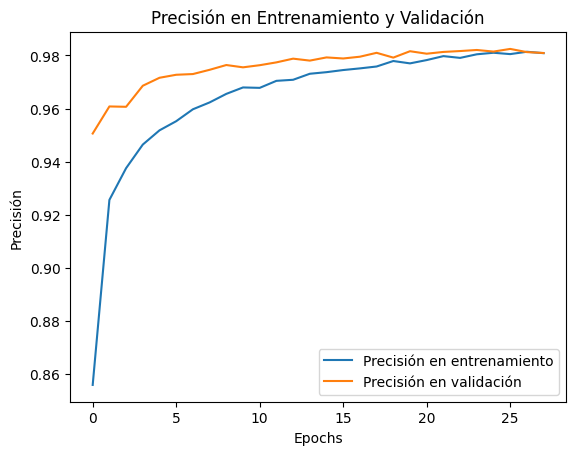

In [ ]:
plt.plot(final_history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(final_history.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Epochs')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión en Entrenamiento y Validación')
plt.show()

In [ ]:
test_loss, test_accuracy = final_model.evaluate(test_images, test_labels, verbose=0)
print(f"Precisión en el conjunto de prueba: {test_accuracy * 100:.2f}%")

Precisión en el conjunto de prueba: 98.39%


Opté por una red de 4 capas densas con un número decreciente de neuronas: 512, 256, 128 y 64. Esta estructura permite a la red extraer características complejas en las primeras capas y luego condensar esa información en las capas más pequeñas, lo cual es beneficioso para captar patrones relevantes sin hacer el modelo excesivamente complejo. Decidí usar la función de activación ReLU en todas las capas ocultas, ya que facilita una convergencia rápida y evita problemas de saturación de gradientes, algo que podría ocurrir con funciones como sigmoid.
Para mejorar la generalización del modelo y reducir el riesgo de sobreajuste, experimenté con varias técnicas de regularización, aunque finalmente decidí omitir una de ellas, la regularización L2, tras analizar los resultados en detalle.

Dropout: Decidí implementar una tasa de Dropout del 30% (0.3) después de cada capa densa. Esta técnica desactiva de forma aleatoria un 30% de las neuronas en cada época, lo que obliga a la red a aprender sin depender de un conjunto específico de neuronas. Con Dropout, el modelo aprende características más generalizables, lo que ayuda a prevenir el sobreajuste, especialmente en redes profundas como esta.

Batch Normalization: Añadí Batch Normalization después de cada capa oculta para estabilizar el entrenamiento y mejorar la rapidez de la convergencia. Esta técnica normaliza las activaciones de cada mini-lote, lo que mantiene los valores en un rango consistente y permite al modelo aprender de forma más estable.

Pruebas con Regularización L2: Al inicio, incluí regularización L2 en cada capa densa con la idea de penalizar los pesos grandes y mantenerlos en un rango controlado, lo cual ayuda a reducir la complejidad del modelo y mejora su capacidad de generalización. Sin embargo, en mis pruebas, el uso de L2 no mejoró los resultados; de hecho, el modelo mostró un rendimiento ligeramente inferior en validación cuando usaba L2 en comparación con la configuración sin ella.

Además, configuré Early Stopping para monitorizar la pérdida de validación y detener el entrenamiento si esta no mejoraba tras tres épocas consecutivas. Esto asegura que el modelo se entrene justo lo necesario, evitando un sobreentrenamiento que podría dañar el rendimiento en validación. Al mismo tiempo, configuré un número elevado de épocas (50) para asegurarme de que el modelo tuviera suficiente tiempo para converger, aunque con Early Stopping esto no representa un problema. De hecho, podría haber configurado hasta 1000 épocas, y el entrenamiento se detendría automáticamente en el punto óptimo gracias a Early Stopping.